In [8]:
import os
# os.environ['DEVICE_ID'] = '7'
import csv
import numpy as np
import mindspore as ms
from mindspore import nn
from mindspore import context
from mindspore import dataset
from mindspore.train.callback import LossMonitor
context.set_context(mode=context.GRAPH_MODE, device_target="Ascend")

with open('iris.data') as csv_file:
 data = list(csv.reader(csv_file, delimiter=','))
print(data[0:5]); print(data[50:55]); print(data[100:105]) # 打印部分数据


[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'], ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'], ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']]
[['7.0', '3.2', '4.7', '1.4', 'Iris-versicolor'], ['6.4', '3.2', '4.5', '1.5', 'Iris-versicolor'], ['6.9', '3.1', '4.9', '1.5', 'Iris-versicolor'], ['5.5', '2.3', '4.0', '1.3', 'Iris-versicolor'], ['6.5', '2.8', '4.6', '1.5', 'Iris-versicolor']]
[['6.3', '3.3', '6.0', '2.5', 'Iris-virginica'], ['5.8', '2.7', '5.1', '1.9', 'Iris-virginica'], ['7.1', '3.0', '5.9', '2.1', 'Iris-virginica'], ['6.3', '2.9', '5.6', '1.8', 'Iris-virginica'], ['6.5', '3.0', '5.8', '2.2', 'Iris-virginica']]


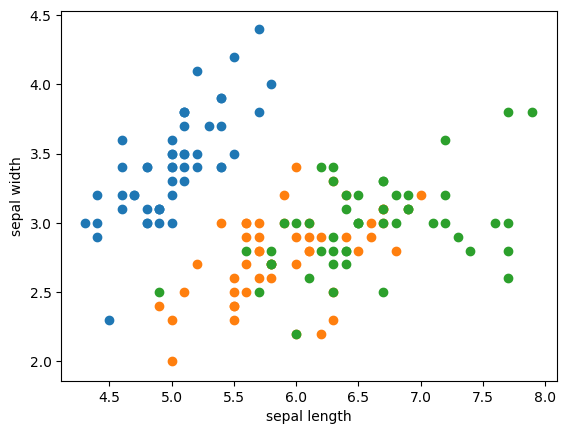

In [9]:
label_map = {
 'Iris-setosa': 0,
 'Iris-versicolor': 1,
 'Iris-virginica': 2
}
X = np.array([[float(x) for x in s[:-1]] for s in data[:150]], np.float32)
Y = np.array([label_map[s[-1]] for s in data[:150]], np.int32)

from matplotlib import pyplot as plt
plt.scatter(X[:50, 0], X[:50, 1], label='Iris-setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], label='Iris-versicolor')
plt.scatter(X[100:, 0], X[100:, 1], label='Iris-virginica')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [10]:
train_idx = np.random.choice(150, 120, replace=False)
test_idx = np.array(list(set(range(150)) - set(train_idx)))
X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

XY_train = list(zip(X_train, Y_train))
XY_train_qie = XY_train[:120]
ds_train = dataset.GeneratorDataset(XY_train_qie, ['x', 'y'])
ds_train = ds_train.shuffle(buffer_size=120).batch(32, drop_remainder=True)
XY_test = list(zip(X_test, Y_test))
XY_test_qie = XY_test[:30]
ds_test = dataset.GeneratorDataset(XY_test_qie, ['x', 'y'])
ds_test = ds_test.batch(30)

net = nn.Dense(4, 3)
loss = nn.loss.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
opt = nn.optim.Momentum(net.trainable_params(), learning_rate=0.05, momentum=0.9)
model = ms.train.Model(net, loss, opt, metrics={'acc', 'loss'})
model.train(25, ds_train, callbacks=[LossMonitor(per_print_times=ds_train.get_dataset_size())], 
dataset_sink_mode=False)
metrics = model.eval(ds_test)
print(metrics)

epoch: 1 step: 3, loss is 1.0052897
epoch: 2 step: 3, loss is 1.0856266
epoch: 3 step: 3, loss is 0.78742206
epoch: 4 step: 3, loss is 0.5381162
epoch: 5 step: 3, loss is 0.6172283
epoch: 6 step: 3, loss is 0.35696805
epoch: 7 step: 3, loss is 0.48947287
epoch: 8 step: 3, loss is 0.59104836
epoch: 9 step: 3, loss is 0.2936051
epoch: 10 step: 3, loss is 0.30693802
epoch: 11 step: 3, loss is 0.2554196
epoch: 12 step: 3, loss is 0.23776332
epoch: 13 step: 3, loss is 0.30649352
epoch: 14 step: 3, loss is 0.23299047
epoch: 15 step: 3, loss is 0.23808467
epoch: 16 step: 3, loss is 0.22796556
epoch: 17 step: 3, loss is 0.2502129
epoch: 18 step: 3, loss is 0.25980288
epoch: 19 step: 3, loss is 0.1906037
epoch: 20 step: 3, loss is 0.25421304
epoch: 21 step: 3, loss is 0.19111742
epoch: 22 step: 3, loss is 0.17239147
epoch: 23 step: 3, loss is 0.1601123
epoch: 24 step: 3, loss is 0.16313756
epoch: 25 step: 3, loss is 0.1661652
{'acc': 0.9666666666666667, 'loss': 0.17330795526504517}
